# Global Sea Surface Temperature

![Map of global sea surface temperatures](images/sea_water_temperatures.png)

The **NOAA 1/4° Daily Optimum Interpolation Sea Surface Temperature** incorporates observations from different platforms (satellites, ships, buoys and Argo floats) into a regular global grid. The dataset is interpolated to fill gaps on the grid and create a spatially complete map of sea surface temperature. Satellite and ship observations are referenced to buoys to compensate for platform differences and sensor biases.

## Data characteristics
- **Spatial resolution**: 0.25° latitude × 0.25° longitude.  
- **Temporal coverage**: Daily values from September 1981 to the present.
- **Updated**: Daily  

> **Note:** Data less than 15 days old may be subject to revision by NCEI

## Useful Links

- **Dataset Information Page**  
  https://www.ncei.noaa.gov/products/optimum-interpolation-sst

- **Dataset Landing Page**  
https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.ncdc:C00844#:~:text=The%20NOAA%201%2F4%20degree,gaps%20filled%20in%20by%20interpolation.
  
- **THREDDS Catalogue**
  - Human interface: https://www.ncei.noaa.gov/thredds/catalog/OisstBase/NetCDF/V2.1/AVHRR/catalog.html
  - Machine interface: https://www.ncei.noaa.gov/thredds/catalog/OisstBase/NetCDF/V2.1/AVHRR/catalog.xml


## Crediting the Data Providers

When using this dataset in publications or presentations, please provide the following citation:  

> Richard W. Reynolds, Viva F. Banzon, and NOAA CDR Program (2008): NOAA Optimum Interpolation 1/4 Degree Daily Sea Surface Temperature (OISST) Analysis, Version 2. [indicate subset used]. NOAA National Centers for Environmental Information. doi:10.7289/V5SQ8XB5 [access date].

## Exploring the data in Python



In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('')

### Importing modules

In [2]:
import xarray as xr # For reading data from a NetCDF file
import matplotlib.pyplot as plt # For plotting the data
import cartopy.crs as ccrs # For plotting maps

### Opening and understanding the data

The data have been published in a series of CF-NetCDF files, one per year, which are updated daily. Whilst it is possible to directly download these data, we are not going to do that. The data are served over a THREDDS catalogue:

- Human interface: https://www.ncei.noaa.gov/thredds/catalog/OisstBase/NetCDF/V2.1/AVHRR/catalog.html
- Machine interface: https://www.ncei.noaa.gov/thredds/catalog/OisstBase/NetCDF/V2.1/AVHRR/catalog.xml

If you click on the human-interface above, you can navigate through the folders and select one of the files. You will see that the data are served over OPeNDAP. OPeNDAP provides a way of streaming data over the internet so you don't have to download them to your own computer. You can copy the OPeNDAP Data URL and use it in your script in the same way that you would use a local filepath.

Let's start by loading in the data from a single file.

In [3]:
url = 'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.2025.nc'
xrds = xr.open_dataset(url)
xrds

<xarray.Dataset> Size: 191MB
Dimensions:  (time: 46, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 368B 2025-01-01 2025-01-02 ... 2025-02-15
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
Data variables:
    sst      (time, lat, lon) float32 191MB ...
Attributes:
    Conventions:                     CF-1.5
    _NCProperties:                   version=2,netcdf=4.7.0,hdf5=1.10.5,
    title:                           NOAA/NCEI 1/4 Degree Daily Optimum Inter...
    institution:                     NOAA/National Centers for Environmental ...
    source:                          NOAA/NCEI https://www.ncei.noaa.gov/data...
    References:                      https://www.psl.noaa.gov/data/gridded/da...
    dataset_title:                   NOAA Daily Optimum Interpolation Sea Sur...
    version:                         Version 2.1
    comment:                         Reynolds, et al.(2007) Daily High-Resolu...
    DODS_EXTRA.Unlimited_Dimension:  time

The OPeNDAP data access URL is predictable, a function of the date. Let's write something to access the data from any date of our choosing.

In [4]:
desired_date = '2024-02-01'
year = desired_date.split('-')[0]

url = f'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.{year}.nc'
xrds = xr.open_dataset(url)

ds_one_day = xrds.sel(time = desired_date)
ds_one_day

<xarray.Dataset> Size: 4MB
Dimensions:  (lat: 720, lon: 1440)
Coordinates:
    time     datetime64[ns] 8B 2024-02-01
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
Data variables:
    sst      (lat, lon) float32 4MB ...
Attributes:
    Conventions:                     CF-1.5
    _NCProperties:                   version=2,netcdf=4.7.0,hdf5=1.10.5,
    title:                           NOAA/NCEI 1/4 Degree Daily Optimum Inter...
    institution:                     NOAA/National Centers for Environmental ...
    source:                          NOAA/NCEI https://www.ncei.noaa.gov/data...
    References:                      https://www.psl.noaa.gov/data/gridded/da...
    dataset_title:                   NOAA Daily Optimum Interpolation Sea Sur...
    version:                         Version 2.1
    comment:                         Reynolds, et al.(2007) Daily High-Resolu...
    DODS_EXTRA.Unlimited_Dimension:  time

The data have 3 dimensions, `time`, `lat` and `lon`. Upon selecting the sea surface temperature (`sst`) data for a single date, we have a 2 dimensional array. Each variable has metadata associated it, and the dataset as a whole has 66 *global* attributes.

Let's have a look at the variable attributes for the `sst` variable for example.

In [5]:
xrds['sst'].attrs

{'long_name': 'Daily Sea Surface Temperature',
 'units': 'degC',
 'valid_range': array([-3., 45.], dtype=float32),
 'precision': 2.0,
 'dataset': 'NOAA High-resolution Blended Analysis',
 'var_desc': 'Sea Surface Temperature',
 'level_desc': 'Surface',
 'statistic': 'Mean',
 'parent_stat': 'Individual Observations',
 'actual_range': array([-1.8 , 36.13], dtype=float32),
 '_ChunkSizes': array([   1,  720, 1440], dtype=int32)}

One noteable attribute is missing. According to the Climate & Forecast (CF) conventions, variables should in most cases have a `standard_name` variable attribute. One could suggest that the data are not FAIR-compliant without this, since the `standard_name` provides a standardised, machine-readable name for the variable. Terms can be taken the CF standard name table found at:

https://cfconventions.org/Data/cf-standard-names/current/build/cf-standard-name-table.html

Standard names are accompanied by a description for the data. The data provider should have carefully read the description upon selecting the standard name, and the data user can also read the description, so the data user and provider share some common understanding about what the data are. 

If the data providers are reading this, please add this!

### Writing the data to a CSV file

You can write all or a subset of the data to a pandas dataframe that you can export as a CSV file.

In [6]:
desired_date = '2024-02-01'
year = desired_date.split('-')[0]

url = f'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.{year}.nc'
xrds = xr.open_dataset(url)

ds_one_day = xrds.sel(time = desired_date)
df = ds_one_day['sst'].to_dataframe()
df.head()

time  sst
lat     lon                  
-89.875 0.125 2024-02-01  NaN
        0.375 2024-02-01  NaN
        0.625 2024-02-01  NaN
        0.875 2024-02-01  NaN
        1.125 2024-02-01  NaN

In [7]:
df.to_csv('global_sea_surface_temperatures.csv')

### Plotting the data for a day of our choosing

Let's use the code we used above to first isolate the data for a single day, then let's build on that to quickly plot the data.

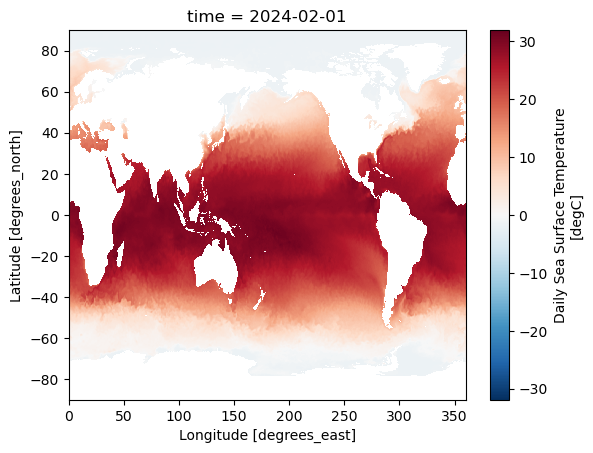

In [8]:
import matplotlib.pyplot as plt

desired_date = '2024-02-01'
year = desired_date.split('-')[0]

url = f'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.{year}.nc'
xrds = xr.open_dataset(url)

ds_one_day = xrds.sel(time = desired_date)
ds_one_day['sst'].plot()
plt.show()

If you accidentally select a date that isn't present in the time series, you can use `method = 'nearest'` to select the data from the nearest timestamp to the date you provide. Other methods can also be used, you can read about this here: 

https://docs.xarray.dev/en/latest/generated/xarray.Dataset.sel.html#xarray-dataset-sel

In [9]:
ds_one_day = xrds.sel(time = desired_date , method='nearest')

Without the coastlines these data are difficult to interpret. Let's now explore how to improve this plot and perhaps use some different projections. 

#### Full working example

Below is a full working example you can copy and play with.

- Map projections: https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html
- Matplotlib built-in colourmaps: https://matplotlib.org/stable/users/explain/colors/colormaps.html
- Colourmaps for oceanography from `cmocean`: https://matplotlib.org/cmocean/

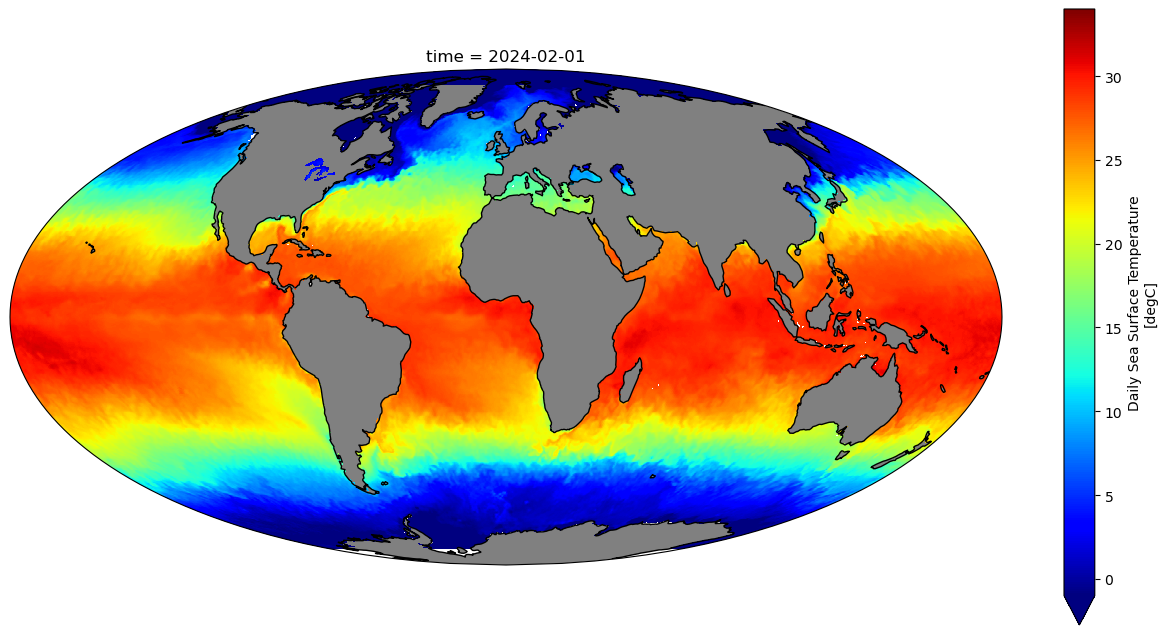

In [10]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

desired_date = '2024-02-01'
year = desired_date.split('-')[0]

projection = ccrs.Mollweide()
transform = ccrs.PlateCarree()

fig = plt.figure(figsize=(16, 8))
ax = plt.axes(projection=projection)

# Load and plot the sea surface temperature data
url = f'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.{year}.nc'
xrds = xr.open_dataset(url)

xrds = xrds.sel(time = desired_date)
sst = xrds['sst'].where(xrds['sst'] > -3)

vmin = -1
vmax = 34

sst.plot(ax=ax, transform=transform, vmin=vmin, vmax=vmax, cmap='jet')

ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='grey')

plt.savefig(f'sea_water_temperatures.png', transparent=True)
plt.show()

### Adding a mask for sea ice

The dataset also includes sea ice concentration data. Let's mask the sea surface temperature data anywhere that the sea ice concentration is greater than 0.

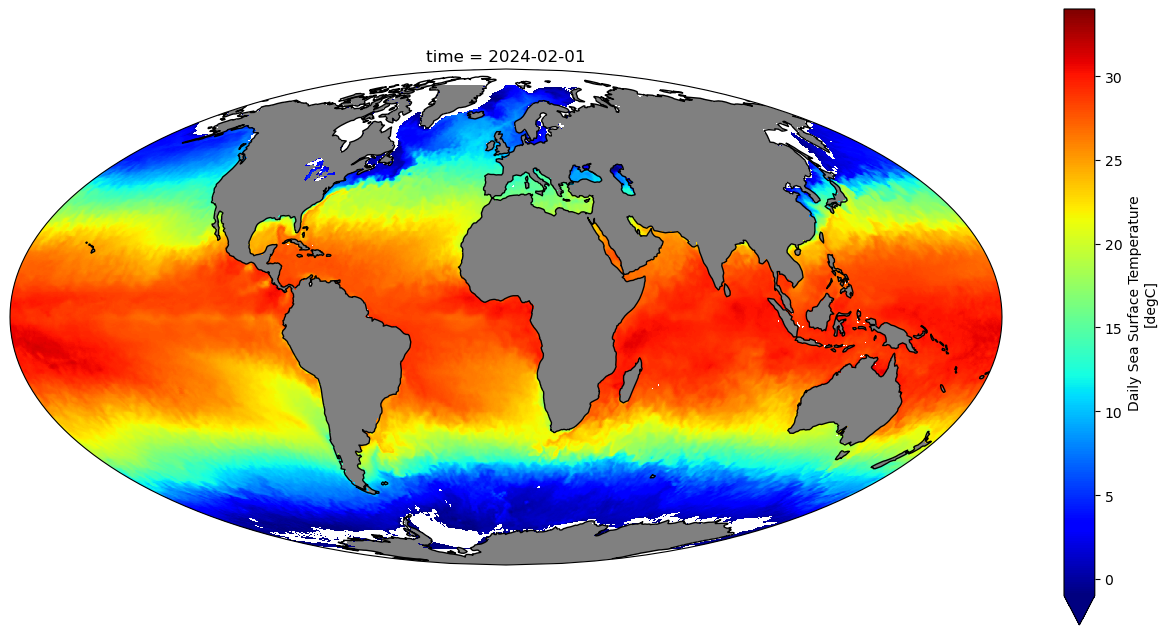

In [11]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

desired_date = '2024-02-01'
year = desired_date.split('-')[0]

projection = ccrs.Mollweide()
transform = ccrs.PlateCarree()

fig = plt.figure(figsize=(16, 8))
ax = plt.axes(projection=projection)

# Load and plot the sea surface temperature data
url = f'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.{year}.nc'
xrds = xr.open_dataset(url)

xrds = xrds.sel(time = desired_date)
sst = xrds['sst'].where(xrds['sst'] > -3)

vmin = -1
vmax = 34

sst.plot(ax=ax, transform=transform, vmin=vmin, vmax=vmax, cmap='jet')

# Load and plot the sea ice
url = f'http://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/icec.day.mean.{year}.nc'
xrds = xr.open_dataset(url)

xrds = xrds.sel(time = desired_date)
ice_mask = xrds['icec'].where(xrds['icec'] > 0)

ice_mask.plot(ax=ax, transform=transform, vmin=1, vmax=2, cmap='Greys', add_colorbar=False)

ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='grey')

plt.savefig(f'sea_water_temperatures.png', transparent=True)
plt.show()

### Zooming in on area of interest

Let's now provide a latitude and longitude range to zoom in on.

If you have an xarray object, for example:

In [12]:
desired_date = '2024-08-01'
year = desired_date.split('-')[0]

url = f'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.{year}.nc'
xrds = xr.open_dataset(url)

ds_one_day = xrds.sel(time = desired_date)

Let's first take a subset of that for our desired range

In [13]:
lat_range = slice(36, 74)
lon_range = slice(0, 45)
ds_aoi = ds_one_day.sel(lat=lat_range, lon=lon_range)
ds_aoi

<xarray.Dataset> Size: 111kB
Dimensions:  (lat: 152, lon: 180)
Coordinates:
    time     datetime64[ns] 8B 2024-08-01
  * lat      (lat) float32 608B 36.12 36.38 36.62 36.88 ... 73.38 73.62 73.88
  * lon      (lon) float32 720B 0.125 0.375 0.625 0.875 ... 44.38 44.62 44.88
Data variables:
    sst      (lat, lon) float32 109kB ...
Attributes:
    Conventions:                     CF-1.5
    _NCProperties:                   version=2,netcdf=4.7.0,hdf5=1.10.5,
    title:                           NOAA/NCEI 1/4 Degree Daily Optimum Inter...
    institution:                     NOAA/National Centers for Environmental ...
    source:                          NOAA/NCEI https://www.ncei.noaa.gov/data...
    References:                      https://www.psl.noaa.gov/data/gridded/da...
    dataset_title:                   NOAA Daily Optimum Interpolation Sea Sur...
    version:                         Version 2.1
    comment:                         Reynolds, et al.(2007) Daily High-Resolu...
    DODS_EXTRA.Unlimited_Dimension:  time

This can be more complicated if you need to handled wrapped longitude ranges. You can do this instead.

In [14]:
data_aoi = ds_one_day.sel(
    lat=slice(36, 74), lon=((ds_one_day.lon >= 335) | (ds_one_day.lon <= 45))
)
data_aoi['lon'].values

array([1.25000e-01, 3.75000e-01, 6.25000e-01, 8.75000e-01, 1.12500e+00,
       1.37500e+00, 1.62500e+00, 1.87500e+00, 2.12500e+00, 2.37500e+00,
       2.62500e+00, 2.87500e+00, 3.12500e+00, 3.37500e+00, 3.62500e+00,
       3.87500e+00, 4.12500e+00, 4.37500e+00, 4.62500e+00, 4.87500e+00,
       5.12500e+00, 5.37500e+00, 5.62500e+00, 5.87500e+00, 6.12500e+00,
       6.37500e+00, 6.62500e+00, 6.87500e+00, 7.12500e+00, 7.37500e+00,
       7.62500e+00, 7.87500e+00, 8.12500e+00, 8.37500e+00, 8.62500e+00,
       8.87500e+00, 9.12500e+00, 9.37500e+00, 9.62500e+00, 9.87500e+00,
       1.01250e+01, 1.03750e+01, 1.06250e+01, 1.08750e+01, 1.11250e+01,
       1.13750e+01, 1.16250e+01, 1.18750e+01, 1.21250e+01, 1.23750e+01,
       1.26250e+01, 1.28750e+01, 1.31250e+01, 1.33750e+01, 1.36250e+01,
       1.38750e+01, 1.41250e+01, 1.43750e+01, 1.46250e+01, 1.48750e+01,
       1.51250e+01, 1.53750e+01, 1.56250e+01, 1.58750e+01, 1.61250e+01,
       1.63750e+01, 1.66250e+01, 1.68750e+01, 1.71250e+01, 1.737

We can then proceed to plotting the data as normal.

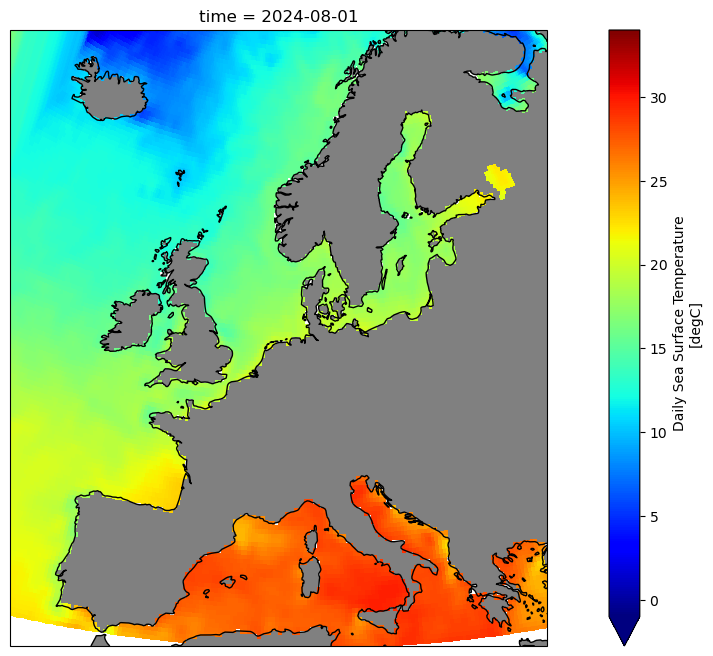

In [15]:
fig = plt.figure(figsize=(16, 8))
projection = ccrs.EuroPP()
transform = ccrs.PlateCarree()
ax = plt.axes(projection=projection)

vmin = -1
vmax = 34
cmap='jet'

data_aoi['sst'].plot(
    ax=ax,
    transform=transform,
    vmin=vmin,
    vmax=vmax, 
    cmap=cmap
)

ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='grey')
plt.show()

### Finding the sea surface temperature at a given location and date

Let's now look at how to find the value for the sea surface temperature at a given location and time. We will using the method `nearest` to find the nearest value to our selected point, though other methods are available.
https://docs.xarray.dev/en/latest/generated/xarray.Dataset.sel.html



In [16]:
import xarray as xr

desired_date = '2024-02-01'
desired_latitude = 73.5624
desired_longitude = 30.0142

year = desired_date.split('-')[0]

# Load and plot the sea surface temperature data
url = f'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.{year}.nc'
xrds = xr.open_dataset(url)

sst_value = xrds.sel(
    time = desired_date,
    lat = desired_latitude,
    lon = desired_longitude,
    method = 'nearest'
)['sst'].values

print(sst_value)


3.87


We might also want to find out what latitude, longitude and time that value corresponds to.

In [17]:
import xarray as xr

desired_date = '2024-02-01'
desired_latitude = 73.5624
desired_longitude = 30.0142

year = desired_date.split('-')[0]

# Load and plot the sea surface temperature data
url = f'https://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean.{year}.nc'
xrds = xr.open_dataset(url)

single_point = xrds.sel(
    time = desired_date,
    lat = desired_latitude,
    lon = desired_longitude,
    method = 'nearest'
)

latitude_value = single_point['lat'].values
longitude_value = single_point['lon'].values
time_value = single_point['time'].values
sst_value = single_point['sst'].values

print('Latitude:',latitude_value)
print('Longitude:',longitude_value)
print('Time:',time_value)
print('Sea surface temperature value:',sst_value)

Latitude: 73.625
Longitude: 30.125
Time: 2024-02-01T00:00:00.000000000
Sea surface temperature value: 3.87
